## The dataset is the healthcare publications, Similar to pubmed or medline metadata. Each row in the datasets represents one published medical research paper, and the columns describe metadata around that paper.


In [5]:
import gzip

# Open and preview lines
with gzip.open("pubmed25n0001.xml.gz", "rt", encoding="utf-8") as f:
    for i, line in enumerate(f):
        print(line.strip())
        if i > 20:  # print only first 20 lines
            break


<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE PubmedArticleSet SYSTEM "http://dtd.nlm.nih.gov/ncbi/pubmed/out/pubmed_250101.dtd">
<PubmedArticleSet>
<PubmedArticle>
<MedlineCitation Status="MEDLINE" IndexingMethod="Manual" Owner="NLM">
<PMID Version="1">1</PMID>
<DateCompleted>
<Year>1976</Year>
<Month>01</Month>
<Day>16</Day>
</DateCompleted>
<DateRevised>
<Year>2024</Year>
<Month>01</Month>
<Day>09</Day>
</DateRevised>
<Article PubModel="Print">
<Journal>
<ISSN IssnType="Print">0006-2944</ISSN>
<JournalIssue CitedMedium="Print">
<Volume>13</Volume>
<Issue>2</Issue>


In [6]:
pip install pubmed-parser


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pubmed_parser import parse_medline_xml

# Parse PubMed XML (compressed)
records = parse_medline_xml("pubmed25n0001.xml.gz")

# Convert to DataFrame
df = pd.DataFrame(records)

# View sample
print(df.head())


                                               title  issue    pages abstract  \
0  Formate assay in body fluids: application in m...  13(2)   117-26            
1  Delineation of the intimate details of the bac...  66(4)   1173-9            
2  Metal substitutions incarbonic anhydrase: a ha...  66(4)   1281-6            
3  Effect of chloroquine on cultured fibroblasts:...  66(4)  1338-43            
4  Atomic models for the polypeptide backbones of...  66(4)  1349-56            

                                             journal  \
0                               Biochemical medicine   
1  Biochemical and biophysical research communica...   
2  Biochemical and biophysical research communica...   
3  Biochemical and biophysical research communica...   
4  Biochemical and biophysical research communica...   

                                             authors pubdate pmid  \
0  Makar|A B|AB|;McMartin|K E|KE|;Palese|M|M|;Tep...    1975    1   
1                         Bose|K S|KS|

In [9]:
df.columns

Index(['title', 'issue', 'pages', 'abstract', 'journal', 'authors', 'pubdate',
       'pmid', 'mesh_terms', 'publication_types', 'chemical_list', 'keywords',
       'doi', 'references', 'delete', 'languages', 'vernacular_title',
       'affiliations', 'pmc', 'other_id', 'medline_ta', 'nlm_unique_id',
       'issn_linking', 'country', 'grant_ids'],
      dtype='object')

In [7]:
df

,title,issue,pages,abstract,journal,authors,pubdate,pmid,mesh_terms,publication_types,...,languages,vernacular_title,affiliations,pmc,other_id,medline_ta,nlm_unique_id,issn_linking,country,grant_ids
0,Formate assay in body fluids: application in m...,13(2),117-26,,Biochemical medicine,Makar|A B|AB|;McMartin|K E|KE|;Palese|M|M|;Tep...,1975,1,D000445:Aldehyde Oxidoreductases; D000818:Anim...,D016428:Journal Article; D013487:Research Supp...,...,eng,,,,,Biochem Med,0151424,0006-2944,United States,"[{'grant_id': 'F32 AG064886', 'grant_acronym':..."
1,Delineation of the intimate details of the bac...,66(4),1173-9,,Biochemical and biophysical research communica...,Bose|K S|KS|;Sarma|R H|RH|,1975,2,D005583:Fourier Analysis; D009682:Magnetic Res...,D016428:Journal Article; D013486:Research Supp...,...,eng,,,,,Biochem Biophys Res Commun,0372516,0006-291X,United States,[]
2,Metal substitutions incarbonic anhydrase: a ha...,66(4),1281-6,,Biochemical and biophysical research communica...,Smith|R J|RJ|;Bryant|R G|RG|,1975,3,D000818:Animals; D001665:Binding Sites; D00210...,D016428:Journal Article; D013487:Research Supp...,...,eng,,,,,Biochem Biophys Res Commun,0372516,0006-291X,United States,[]
3,Effect of chloroquine on cultured fibroblasts:...,66(4),1338-43,,Biochemical and biophysical research communica...,Wiesmann|U N|UN|;DiDonato|S|S|;Herschkowitz|N ...,1975,4,"D001692:Biological Transport; D002478:Cells, C...",D016428:Journal Article,...,eng,,,,,Biochem Biophys Res Commun,0372516,0006-291X,United States,"[{'grant_id': 'BB/C008219/1', 'grant_acronym':..."
4,Atomic models for the polypeptide backbones of...,66(4),1349-56,,Biochemical and biophysical research communica...,Hendrickson|W A|WA|;Ward|K B|KB|,1975,5,D000818:Animals; D003063:Cnidaria; D003201:Com...,D016428:Journal Article,...,eng,,,,,Biochem Biophys Res Commun,0372516,0006-291X,United States,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,[Place of beta-blockers in the treatment of es...,7(31),2785-8,,La Nouvelle presse medicale,Dallocchio|M|M|;Clémenty|J|J|;Dany|F|F|,1978,30965,"D000284:Administration, Oral; D000319:Adrenerg...",D016428:Journal Article,...,fre,Place des bêta-bloquants dans le traitement de...,,,,Nouv Presse Med,0312552,0301-1518,France,[]
29996,[Long-term utilization of beta-blockers in art...,7(31),2789-94,,La Nouvelle presse medicale,Tannenbaum|H|H|,1978,30966,D000070:Acebutolol; D000319:Adrenergic beta-An...,D016428:Journal Article; D016454:Review,...,fre,Utilisation au long cours des bêta-bloquants d...,,,,Nouv Presse Med,0312552,0301-1518,France,[]
29997,[beta-blockers in hypertension with renal fail...,7(31),2795-7,,La Nouvelle presse medicale,Guédon|J|J|;Aubert|P|P|;Lucsko|M|M|;Chaignon|M|M|,1978,30967,D000070:Acebutolol; D000319:Adrenergic beta-An...,D016428:Journal Article,...,fre,Les bêta-bloquants dans l'hypertension avec in...,,,,Nouv Presse Med,0312552,0301-1518,France,[]
29998,[Treatment by beta-blockers of arterial hypert...,7(31),2799-801,,La Nouvelle presse medicale,Fillastre|J P|JP|;Godin|M|M|,1978,30968,D000070:Acebutolol; D000319:Adrenergic beta-An...,D016428:Journal Article,...,fre,Traitement de l'hypertension artérielle du mal...,,,,Nouv Presse Med,0312552,0301-1518,France,[]


In [10]:
##INspect the datasets

# Basic shape
print("Shape of dataset:", df.shape)

# First few rows
df.head()

# Data types and nulls, and memory usage
df.info()

# Basic statistics
df.describe(include='all')


Shape of dataset: (30000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              30000 non-null  object
 1   issue              30000 non-null  object
 2   pages              30000 non-null  object
 3   abstract           30000 non-null  object
 4   journal            30000 non-null  object
 5   authors            30000 non-null  object
 6   pubdate            30000 non-null  object
 7   pmid               30000 non-null  object
 8   mesh_terms         30000 non-null  object
 9   publication_types  30000 non-null  object
 10  chemical_list      30000 non-null  object
 11  keywords           30000 non-null  object
 12  doi                30000 non-null  object
 13  references         30000 non-null  object
 14  delete             30000 non-null  bool  
 15  languages          30000 non-null  object
 16  vernacular

,title,issue,pages,abstract,journal,authors,pubdate,pmid,mesh_terms,publication_types,...,languages,vernacular_title,affiliations,pmc,other_id,medline_ta,nlm_unique_id,issn_linking,country,grant_ids
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,29911,4248,14625,15377,2031,27400,5,30000,29904,132,...,37,6377,8,2,452,2034,2034,1987,73,51
top,EKG of the month.,,1-8,,The Journal of pharmacy and pharmacology,,1976,1,D000319:Adrenergic beta-Antagonists; D006801:H...,D016428:Journal Article,...,eng,,,,,J Pharm Pharmacol,0376363,0022-3573,United States,[]
freq,10,884,35,14623,1036,504,10239,1,9,15838,...,23192,23613,29993,29999,29549,1036,1036,1036,10274,29926


In [11]:
##COnvert and clean basic datatype

# Convert pubdate to datetime
df['pubdate'] = pd.to_datetime(df['pubdate'], errors='coerce')

# Clean text columns (strip spaces)
text_columns = ['title', 'abstract', 'journal', 'authors', 'mesh_terms', 'publication_types', 'country']
for col in text_columns:
    df[col] = df[col].astype(str).str.strip()


In [23]:
##CHeck for missing value

missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing


Series([], dtype: int64)

In [22]:
# Check for duplicate PMIDs
duplicates = df[df.duplicated(subset='pmid', keep=False)]

# Print summary
if not duplicates.empty:
    print(f"Found {duplicates.shape[0]} duplicate rows based on 'pmid'.")
    display(duplicates.head())  # Optional: show first few duplicate rows
else:
    print("No duplicate 'pmid' entries found.")


No duplicate 'pmid' entries found.


In [24]:
##Identify categorical vs numeric columns

df.dtypes.value_counts()

# Manual classification
categorical_cols = ['journal', 'authors', 'mesh_terms', 'publication_types', 'languages', 'country']
numeric_cols = ['year']

# Ensure pubdate is datetime
df['pubdate'] = pd.to_datetime(df['pubdate'], errors='coerce')

# Extract year
df['year'] = df['pubdate'].dt.year


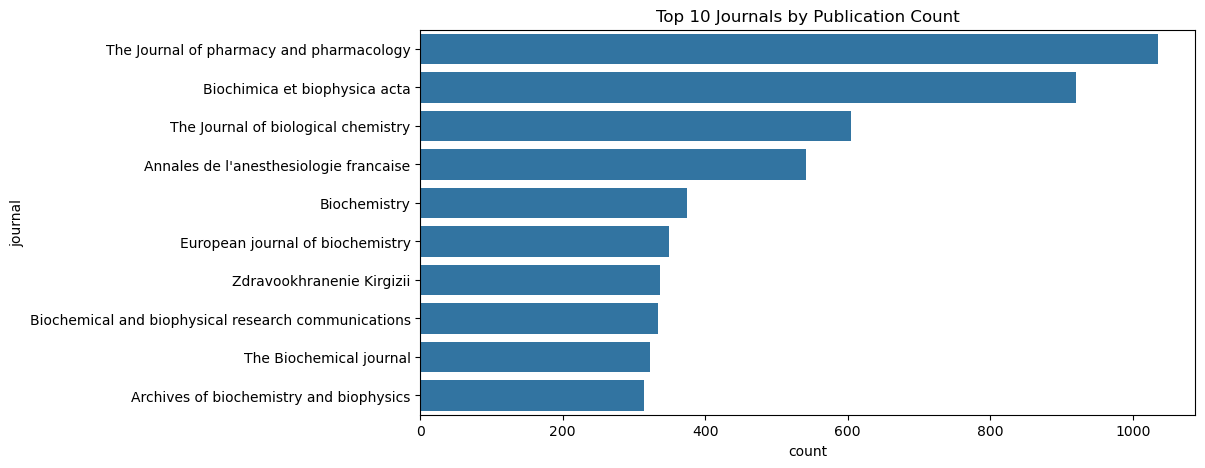

In [16]:
##Simple EDA

plt.figure(figsize=(10,5))
sns.countplot(y=df['journal'], order=df['journal'].value_counts().head(10).index)
plt.title('Top 10 Journals by Publication Count')
plt.show()


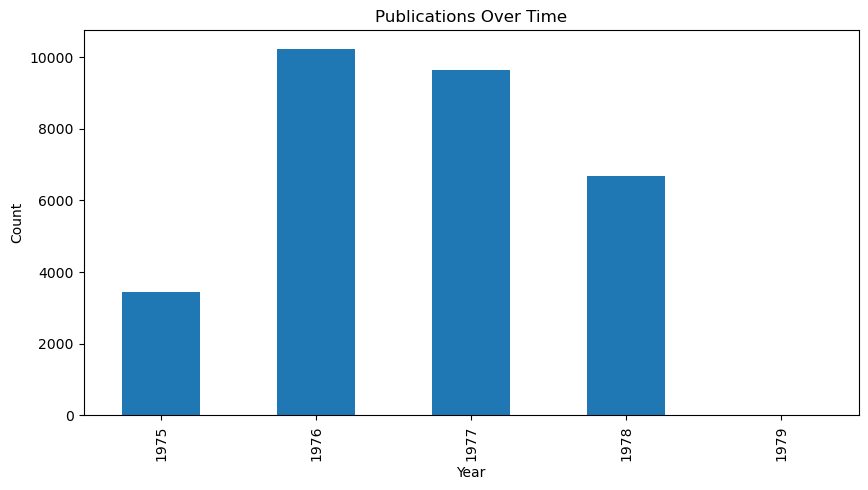

In [26]:
plt.figure(figsize=(10,5))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Publications Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


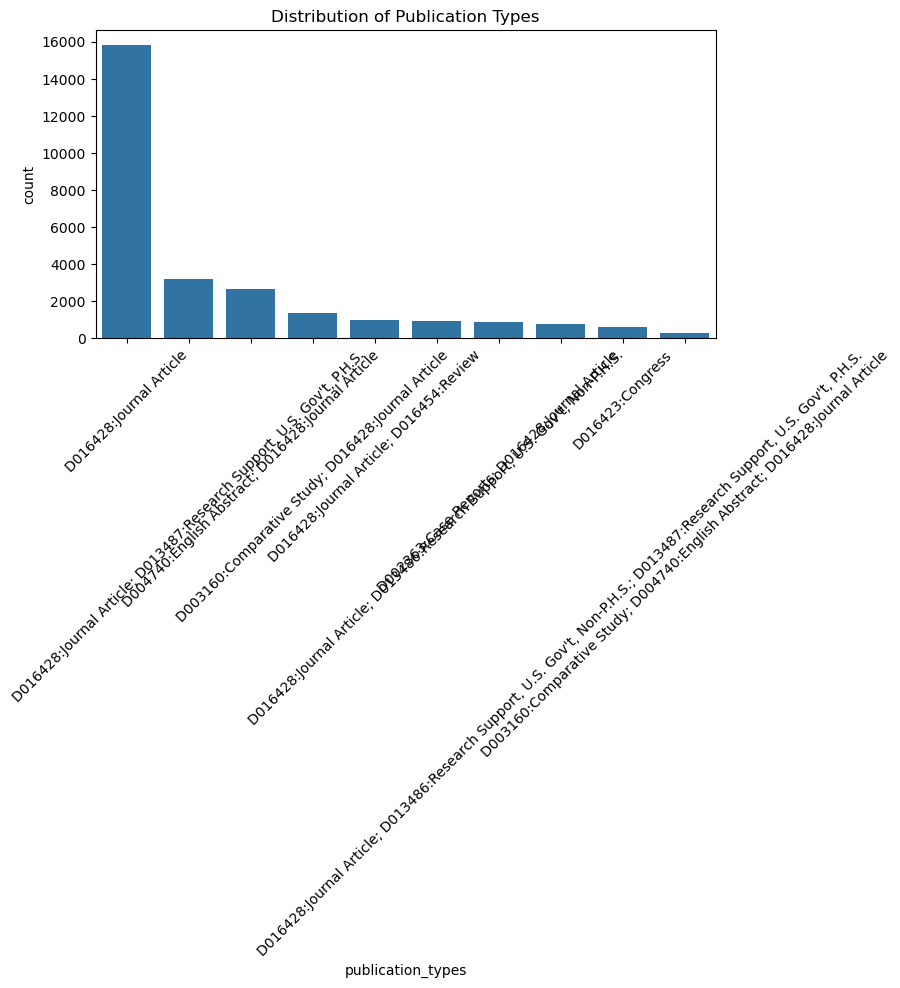

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(x='publication_types', data=df, order=df['publication_types'].value_counts().head(10).index)
plt.xticks(rotation=45)
plt.title('Distribution of Publication Types')
plt.show()


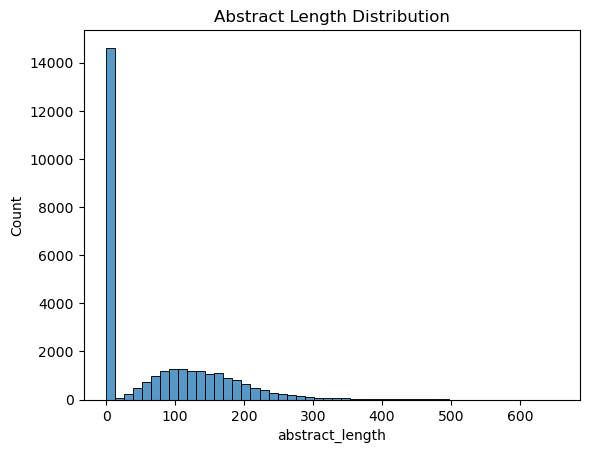

In [19]:
##Check length of abstracts (to assess quality for NLP)

df['abstract_length'] = df['abstract'].apply(lambda x: len(str(x).split()))
sns.histplot(df['abstract_length'], bins=50)
plt.title('Abstract Length Distribution')
plt.show()


In [20]:
##Summary snapsshot

summary = {
    "Total Rows": len(df),
    "Total Columns": len(df.columns),
    "Categorical Columns": len(categorical_cols),
    "Numeric Columns": len(numeric_cols),
    "Missing Values (%)": round(df.isnull().mean() * 100, 2).to_dict()
}
summary


{'Total Rows': 30000,
 'Total Columns': 26,
 'Categorical Columns': 6,
 'Numeric Columns': 1,
 'Missing Values (%)': {'title': 0.0,
  'issue': 0.0,
  'pages': 0.0,
  'abstract': 0.0,
  'journal': 0.0,
  'authors': 0.0,
  'pubdate': 0.0,
  'pmid': 0.0,
  'mesh_terms': 0.0,
  'publication_types': 0.0,
  'chemical_list': 0.0,
  'keywords': 0.0,
  'doi': 0.0,
  'references': 0.0,
  'delete': 0.0,
  'languages': 0.0,
  'vernacular_title': 0.0,
  'affiliations': 0.0,
  'pmc': 0.0,
  'other_id': 0.0,
  'medline_ta': 0.0,
  'nlm_unique_id': 0.0,
  'issn_linking': 0.0,
  'country': 0.0,
  'grant_ids': 0.0,
  'abstract_length': 0.0}}

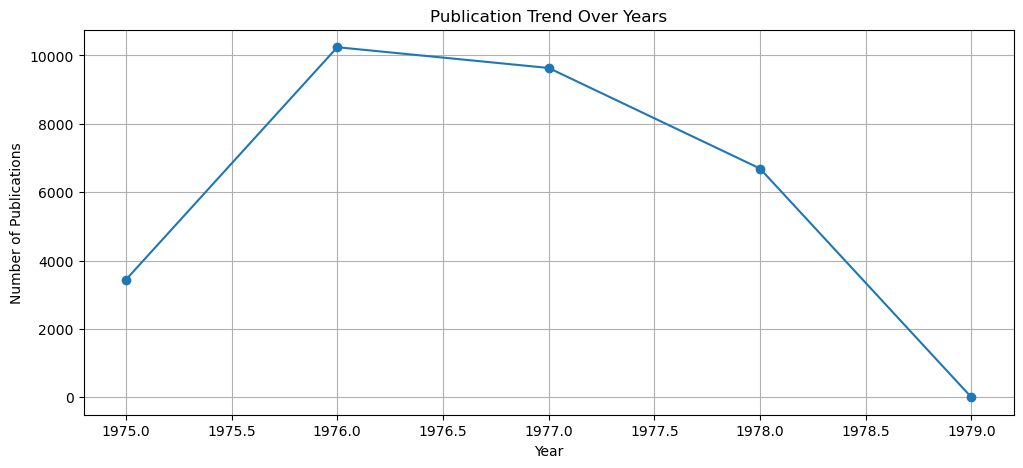

In [27]:
##Publication trends over time

# Count publications by year
pub_by_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(12,5))
pub_by_year.plot(kind='line', marker='o')
plt.title('Publication Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.show()


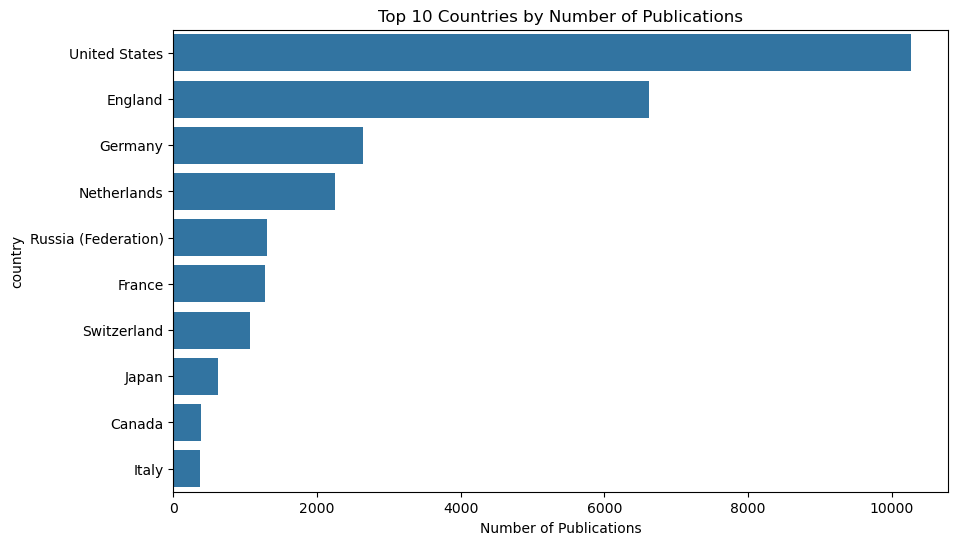

In [31]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Publications')
plt.xlabel('Number of Publications')
plt.show()


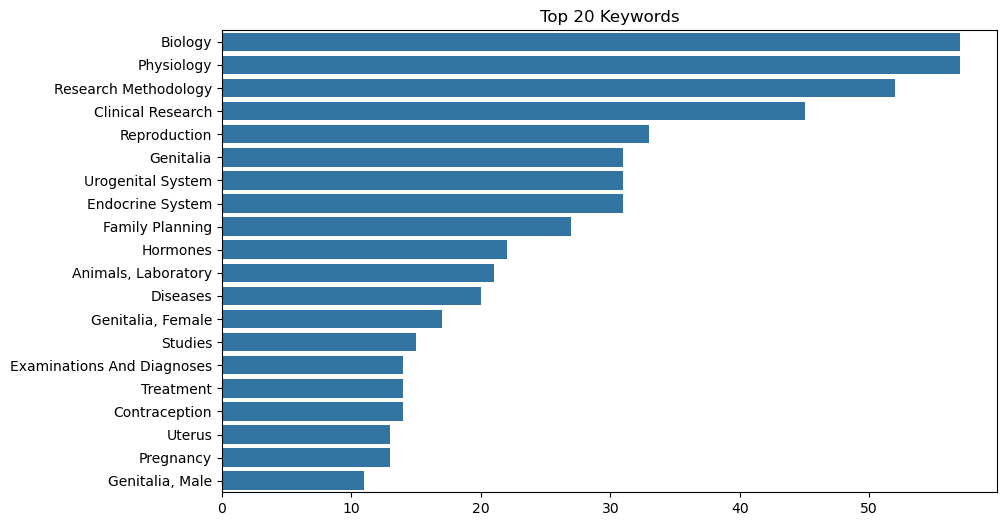

In [32]:
##Keywords and Mesh term Analysis.

from collections import Counter

# Flatten all keywords into a list
all_keywords = df['keywords'].dropna().str.split(';').sum()
keyword_counts = Counter([k.strip() for k in all_keywords if k.strip() != ''])

# Top 20 keywords
top_keywords = dict(keyword_counts.most_common(20))

plt.figure(figsize=(10,6))
sns.barplot(x=list(top_keywords.values()), y=list(top_keywords.keys()))
plt.title('Top 20 Keywords')
plt.show()


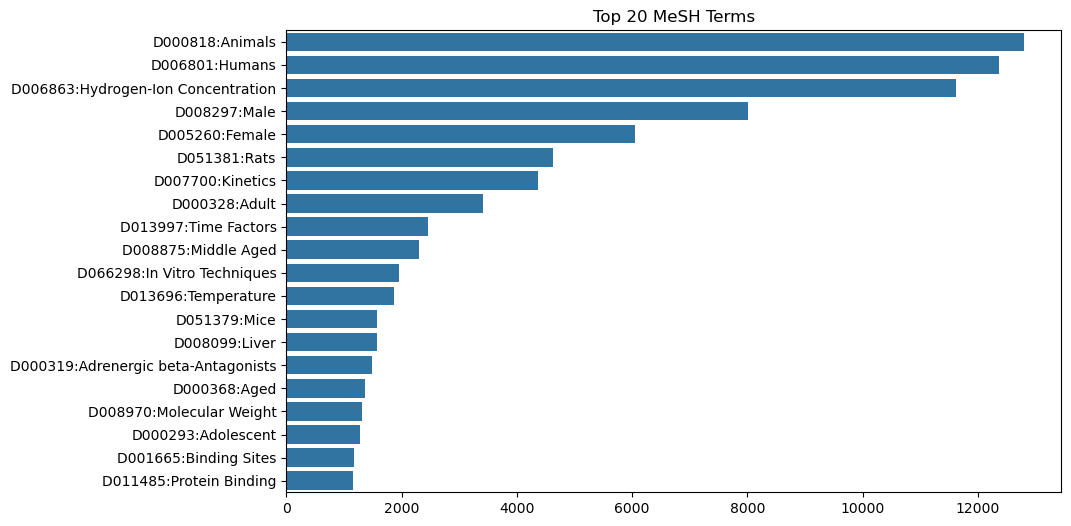

In [33]:
## Most frequent Mesh term

all_mesh = df['mesh_terms'].dropna().str.split(';').sum()
mesh_counts = Counter([m.strip() for m in all_mesh if m.strip() != ''])

top_mesh = dict(mesh_counts.most_common(20))

plt.figure(figsize=(10,6))
sns.barplot(x=list(top_mesh.values()), y=list(top_mesh.keys()))
plt.title('Top 20 MeSH Terms')
plt.show()


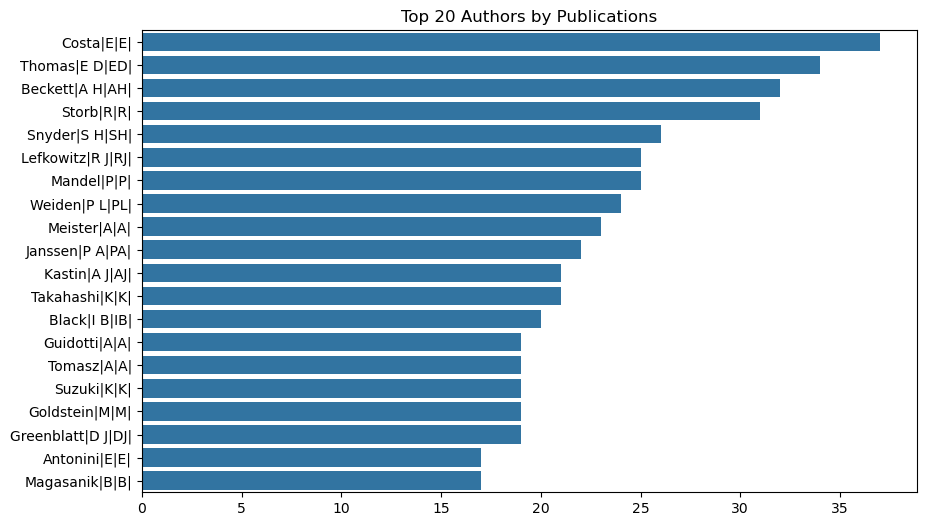

In [34]:
## Top authors by publication count

all_authors = df['authors'].dropna().str.split(';').sum()
author_counts = Counter([a.strip() for a in all_authors if a.strip() != ''])
top_authors = dict(author_counts.most_common(20))

plt.figure(figsize=(10,6))
sns.barplot(x=list(top_authors.values()), y=list(top_authors.keys()))
plt.title('Top 20 Authors by Publications')
plt.show()
